

 ### Objective: Evaluate model performance across K-Fold Cross and Stratified K-Fold from pandas df.

 * Determine input feature are X = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price','condition','yr_built','zipcode']
 * Determine target feature is y = ['bedrooms']

 Classify houses based on specific bedroom categories (e.g., 1-2, 3-4, 5) and evaluate model performance across K-Fold Cross and Stratified K-Fold from pandas df.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold # import KFold

url = 'https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv'
df = pd.read_csv(url)

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### The dataset contains multiple columns with features such as the date of sale, price, number of bedrooms and bathrooms, living space square footage, and more.
### The 'bedrooms' column has values ranging from 0 to 33. However, the vast majority of houses have between 1 and 5 bedrooms.

In [ ]:
bedroom_distribution = df['bedrooms'].value_counts().sort_index()

bedroom_distribution

0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Classify houses based on specific bedroom categories (e.g., 1-2, 3-4, 5+ bedrooms) or
Focus on the most common categories and exclude rare ones.
For this demonstration, I'll focus on the most common categories: 1 to 5 bedrooms. We can later decide if we want to approach it differently.

Next, I'll preprocess the data:
* Classify houses based on specific bedroom categories (e.g., 1-2, 3-4, 5)
* Drop non-numeric columns and those not relevant for our analysis, such as 'id' and 'date'.
* Filter out rows where the number of bedrooms is not between 1 and 5.
* Split the data into features (X) and target (y).
* Scale the feature data to ensure that all features have similar scales, which is crucial for logistic regression.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop non-numeric and non-relevant columns
data_cleaned = df.drop(columns=['id', 'date'])

# Filter rows where bedrooms are between 1 and 5
data_cleaned = data_cleaned[data_cleaned['bedrooms'].between(1, 5)]

# Split data into features and target
dfX = data_cleaned.drop(columns=['bedrooms'])
dfY = data_cleaned['bedrooms']


In [ ]:
dfX

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
dfY

0        3
1        3
2        2
3        4
4        3
        ..
21608    3
21609    4
21610    2
21611    3
21612    2
Name: bedrooms, Length: 21266, dtype: int64

# Standard Scaler Normalization

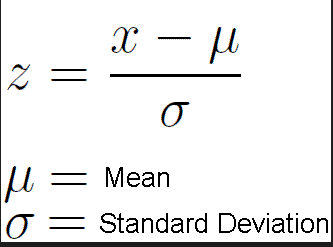

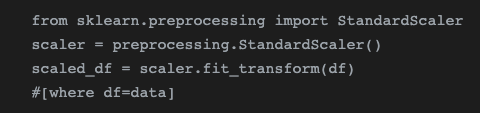

#Min-Max Scaler  Normalization

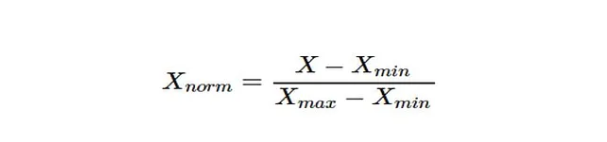

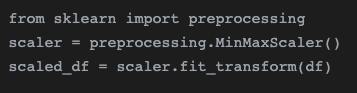

In [ ]:

# Scale the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled features for verification
dfX_scaled =  pd.DataFrame(X_scaled, columns=dfX.columns)
dfX_scaled

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.883962,-1.464880,-0.984629,-0.226855,-0.911872,-0.086793,-0.303062,-0.628994,-0.556430,-0.731451,-0.655708,-0.550058,-0.208375,1.870723,-0.348978,-0.308301,-0.941285,-0.260779
1,0.007632,0.201473,0.571422,-0.188455,0.942124,-0.086793,-0.303062,-0.628994,-0.556430,0.483515,0.269316,-0.686388,4.786594,0.880185,1.162089,-0.747440,-0.428100,-0.187584
2,-1.002145,-1.464880,-1.443609,-0.121930,-0.911872,-0.086793,-0.303062,-0.628994,-1.411976,-1.234619,-0.655708,-1.299870,-0.208375,-0.932687,1.283810,-0.138313,1.082128,-0.172018
3,0.193792,1.201285,-0.111449,-0.242534,-0.911872,-0.086793,-0.303062,2.447758,-0.556430,-0.890992,1.448721,-0.209235,-0.208375,1.085769,-0.279835,-1.271572,-0.911960,-0.284699
4,-0.071345,-0.131797,-0.424898,-0.168242,-0.911872,-0.086793,-0.303062,-0.628994,0.299115,-0.117832,-0.655708,0.540577,-0.208375,-0.072974,0.411597,1.193268,-0.266814,-0.192589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21261,-0.494436,0.534744,-0.592818,-0.335858,2.796119,-0.086793,-0.303062,-0.628994,0.299115,-0.301918,-0.655708,1.290389,-0.208375,0.469018,1.005796,-0.938677,-0.662699,-0.413167
21262,-0.381612,0.534744,0.280362,-0.222924,0.942124,-0.086793,-0.303062,-0.628994,0.299115,0.655328,-0.655708,1.460800,-0.208375,1.272663,-0.352579,-1.052003,-0.222827,-0.203739
21263,-0.375686,-1.798150,-1.163743,-0.330575,0.942124,-0.086793,-0.303062,-0.628994,-0.556430,-0.927810,-0.655708,1.290389,-0.208375,1.235284,0.250263,-0.605782,-1.410482,-0.394840
21264,-0.381612,0.534744,-0.514455,-0.305538,0.942124,-0.086793,-0.303062,-0.628994,0.299115,-0.216011,-0.655708,1.119977,-0.208375,-0.951376,-0.181162,1.023279,-0.838648,-0.421336


 # K-fold Cross Validation

hint : create model for bedrooms prediction



Fold 1, Accuracy: 0.62
Fold 2, Accuracy: 0.62
Fold 3, Accuracy: 0.61
Fold 4, Accuracy: 0.61
Fold 5, Accuracy: 0.60


#  Stratified K-Fold Cross Validation

hint : create model for bedroom prediction

model_grade = xxxx

Fold 1, Accuracy: 0.61
Fold 2, Accuracy: 0.60
Fold 3, Accuracy: 0.62
Fold 4, Accuracy: 0.61
Fold 5, Accuracy: 0.61
